<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/ClusteringAssgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch  

In [36]:
df = pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [37]:
df.rename({"Unnamed: 0":"City"},axis=1,inplace=True)
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
df1=df.drop(['City'],axis=1)

In [17]:
df2 = df1.values

In [19]:
from sklearn.preprocessing import scale
df2 = scale(df2)            

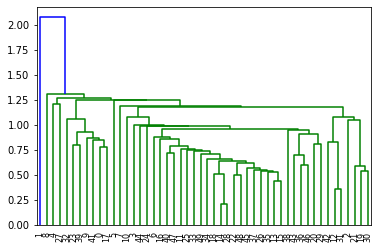

In [20]:
dendrogram = sch.dendrogram(sch.linkage(df2, method='single'))

In [22]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=4)

In [23]:
y_hc = hc.fit_predict(df2)
cluster = pd.DataFrame(y_hc,columns=['Cluster'])

In [24]:
y_hc

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
cluster

,Cluster
0,0
1,3
2,0
3,0
4,1
5,0
6,0
7,0
8,2
9,0


In [38]:
df['Cluster_HC'] = cluster

In [39]:
df

,City,Murder,Assault,UrbanPop,Rape,Cluster_HC
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


#K-Means

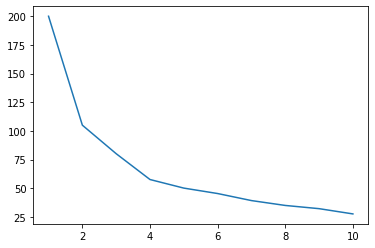

In [29]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=None)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [42]:
cluster_new=KMeans(n_clusters=4,random_state=None)
cluster_new.fit(df2)
cluster_new.labels_

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [45]:
cluster1 = pd.DataFrame(data=cluster_new.labels_,columns=['Cluster_KMeans'])

In [46]:
df['Cluster_KMeans'] = cluster1

In [47]:
df

,City,Murder,Assault,UrbanPop,Rape,Cluster_HC,Cluster_KMeans
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,1,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,2,0
9,Georgia,17.4,211,60,25.8,0,3
